Choisir une date AAAA MM JJ   : 2016 08 08


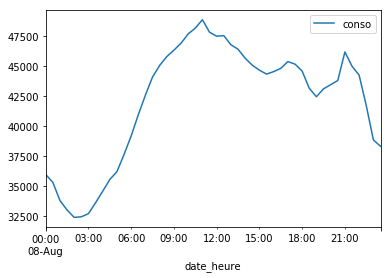

In [1]:
"""
Plot any timeserie taken from the https://rte-opendata.opendatasoft.com plateform.
Choose parameters below after visiting the portal
"""

%matplotlib inline
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

DATASET = "cdc_conso"
date_col = "date_heure"
value_col = "conso"
rows = 1000
requested_date = ""

while not re.match("\d{4}\s\d{2}\s\d{2}", requested_date):
    requested_date = input("Choisir une date AAAA MM JJ   : ")

ODS_API_URL = "https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset={dataset}&rows={rows}&sort=-{date_col}"

api_url = ODS_API_URL.format(dataset=DATASET, rows=rows ,date_col=date_col)

r = requests.get("{}&refine.date_heure={}".format(api_url,requested_date.replace(" ","%2F")))
data = r.json()
df = pd.DataFrame.from_dict([d["fields"] for d in data["records"]])
df[date_col]=pd.to_datetime(df[date_col])
timeserie = df.set_index(df[date_col])
timeserie.plot()

